In [1]:
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import crystalball
from scipy.optimize import curve_fit,Bounds
from scipy.integrate import simps
import zfit_physics as zphysics
import zfit
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import mplhep
import uncertainties 
from uncertainties import ufloat
import tensorflow as tf

plt.style.use('belle2')
#%jsroot on


%run /afs/desy.de/user/j/jipatel/MT/MC_fit/Files_After_Acceptance/Signal_Background_thesis_final/Function.ipynb

2024-07-18 18:39:23.006588: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 18:39:26.466981: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 18:39:26.467957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 18:39:42.008863: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/afs/desy.de/user/j/jipatel/.local/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warnin

In [2]:
file_bkg="/pnfs/desy.de/belle/local/user/msobotzi/p5prime/FilesAfterAcceptance/MC15/background/Bpeepip4Streams.root"
file_signal="/pnfs/desy.de/belle/local/user/msobotzi/p5prime/FilesAfterAcceptance/MC15/signal/Bpeepip4Streams.root"



In [3]:
mc_ele_signal,mc_ele_bkg, mc_ele_signal_weight,mc_ele_bkg_weight = process_MC_data_combined(file_signal, file_bkg, 'ele', '521', 'pip', 'ee', 12, 'rec521')



In [4]:

fit_and_integrate(mc_ele_signal, param_fl_start=0.5, param_s3_start=0.01, param_p5_start=0.02, floating=True)


/tmp/ipykernel_350994/4262147721.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cosTheta_L'] = data['cosTheta_L'].abs()
/tmp/ipykernel_350994/4262147721.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_b_gr['phi_B'] = 2 * np.pi - phi_b_gr['phi_B']


name                   value  (rounded)        hesse    at limit
-------------------  ------------------  -----------  ----------
extended_0.47283154             2098.54  +/- 5.9e-06       False
param_fl_0.47283154             0.53756  +/-   0.047       False
param_s3_0.47283154          0.00349084  +/-   0.061       False
param_p5_0.47283154           -0.123054  +/-    0.14       False
Fit result valid:
True
Signal Events in MC Data = 2098.555948337008
Integrated PDF with trim: 1.0261826613563438
Integrated PDF without trim: 1.1108181970554805
Proportion of data lost: 0.0762


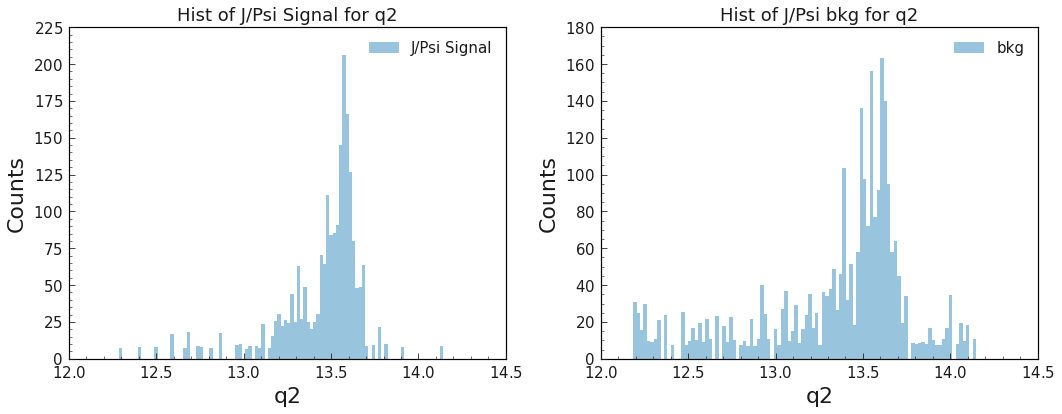

In [5]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))


# q2_signal
plot_histogram(axs[0], {"J/Psi Signal": mc_ele_signal["q2"]}, ["J/Psi Signal"],
               {"J/Psi Signal": mc_ele_signal_weight}, 'q2', 'Counts', 'Hist of J/Psi Signal for q2')

# q2_bkg
plot_histogram(axs[1], {
                           "bkg": mc_ele_bkg["q2"]},
               ["bkg"],
               {"bkg": mc_ele_bkg_weight},
               'q2', 'Counts', 'Hist of J/Psi bkg for q2')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

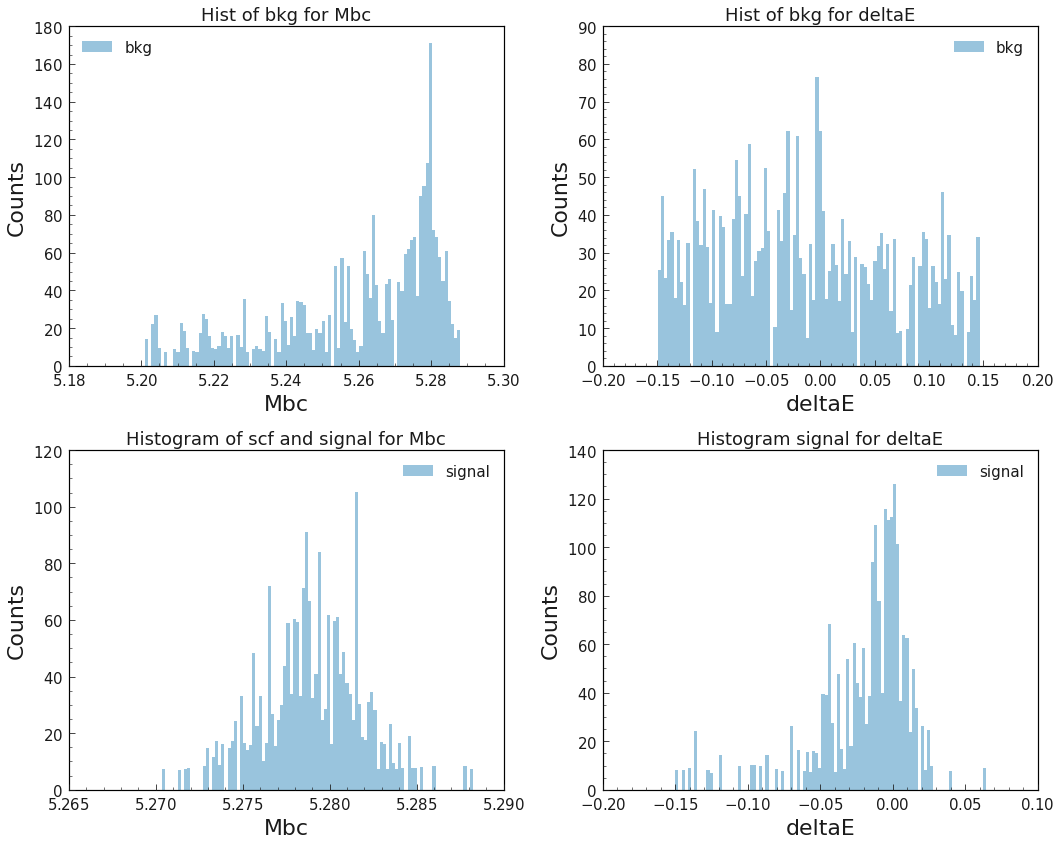

In [6]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Mbc_bkg
plot_histogram(axs[0, 0],{"bkg":  mc_ele_bkg["Mbc"]},
               ["bkg"],
               {"bkg": mc_ele_bkg_weight},
               'Mbc', 'Counts', 'Hist of bkg for Mbc')

# deltaE_bkg
plot_histogram(axs[0, 1],{"bkg": mc_ele_bkg["deltaE"]},
               [ "bkg"],
               {"bkg": mc_ele_bkg_weight},
               'deltaE', 'Counts', 'Hist of bkg for deltaE')

# Mbc_signal 
plot_histogram(axs[1, 0],{"signal": mc_ele_signal["Mbc"]}, 
               ["signal"],
               {"signal": mc_ele_signal_weight}, 
               'Mbc', 'Counts', 'Histogram of scf and signal for Mbc')


# deltaE_signal
plot_histogram(axs[1, 1],{"signal": mc_ele_signal["deltaE"]}, 
               ["signal"],
               {"signal": mc_ele_signal_weight},
               'deltaE', 'Counts', 'Histogram signal for deltaE')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
#Signal
Mbc_ele_signal_cb,result_Mbc_signal= fit('Mbc', 'ele', 'signal', mc_ele_signal["Mbc"],mc_ele_signal_weight,'cb',12)
deltaE_ele_signal_cb_gauss,result_deltaE_signal= fit('deltaE', 'ele', 'signal', mc_ele_signal["deltaE"],mc_ele_signal_weight, 'cb_gauss',12)

#bkg_bkg
Mbc_ele_bkg_argus_gauss,result_Mbc_bkg= fit('Mbc', 'ele', 'bkg', mc_ele_bkg["Mbc"],mc_ele_bkg_weight, 'argus_gauss',12)
deltaE_ele_bkg_poly_gauss,result_deltaE_bkg = fit('deltaE', 'ele', 'bkg', mc_ele_bkg["deltaE"],mc_ele_bkg_weight, 'poly_gauss',12)


name                             value  (rounded)    at limit
-----------------------------  ------------------  ----------
mu_ele_Mbc_signal_cb_0.439                  5.279       False
sigma_ele_Mbc_signal_cb_0.439          0.00292083       False
alpha_ele_Mbc_signal_cb_0.439             4.49421       False
n_ele_Mbc_signal_cb_0.439                 17.0343       False
True
name                                      value  (rounded)    at limit
--------------------------------------  ------------------  ----------
frac_ele_deltaE_signal_cb_gauss_0.7073            0.462655       False
mu_ele_deltaE_signal_cb_0.7073                  -0.0013083       False
sigma_ele_deltaE_signal_cb_0.7073               0.00851914       False
alpha_ele_deltaE_signal_cb_0.7073                  2.42556       False
n_ele_deltaE_signal_cb_0.7073                   0.00043435       False
mu_ele_deltaE_signal_gauss_0.7073               -0.0176212       False
sigma_ele_deltaE_signal_gauss_0.7073             0.0243

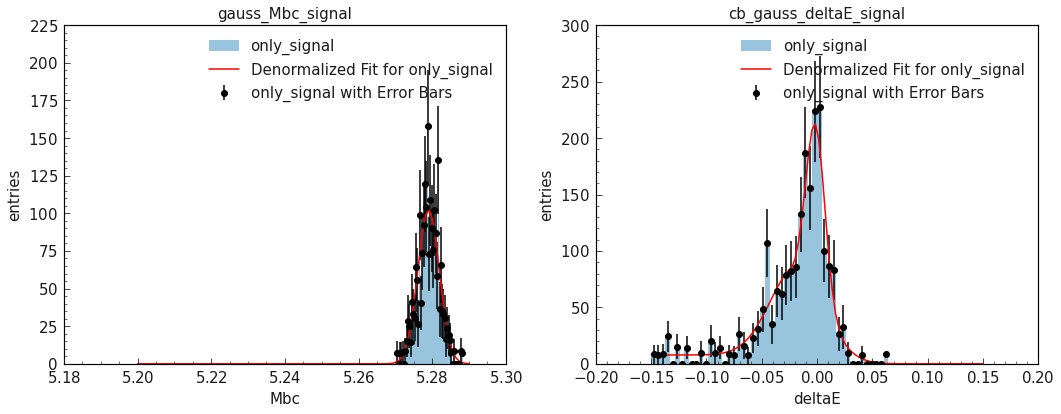

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Changed to 2 rows, 2 columns

Mbc_range = np.linspace(5.20, 5.29, 100)
deltaE_range = np.linspace(-0.15, 0.15, 100)

fit_model_Mbc_signal = plot_with_fit(axs[0], 50, mc_ele_signal["Mbc"], mc_ele_signal_weight, 
                                           Mbc_ele_signal_cb, Mbc_range, 
                                           'only_signal', 'Denormalized Fit for only_signal', 
                                           'Mbc', 'entries', 'gauss_Mbc_signal')

fit_model_deltaE_signal = plot_with_fit(axs[1], 50, mc_ele_signal["deltaE"], mc_ele_signal_weight, 
                                             deltaE_ele_signal_cb_gauss, deltaE_range, 
                                             'only_signal', 'Denormalized Fit for only_signal', 
                                             'deltaE', 'entries', 'cb_gauss_deltaE_signal')



# Adjust layout
plt.tight_layout()

# Print results if needed
print(result_Mbc_signal.params)
print(result_Mbc_signal.valid)
print(result_deltaE_signal.params)
print(result_deltaE_signal.valid)


# Show the plots
plt.show()


name                                   value  (rounded)    at limit
-----------------------------------  ------------------  ----------
frac_ele_Mbc_bkg_argus_gauss_0.3767            0.777244       False
m_ele_Mbc_bkg_argus_0.3767                      5.28828       False
c_ele_Mbc_bkg_argus_0.3767                     -86.5264       False
p_ele_Mbc_bkg_argus_0.3767                     0.461779       False
mu_ele_Mbc_bkg_gauss_0.3767                     5.27906       False
sigma_ele_Mbc_bkg_gauss_0.3767               0.00295264       False
False
name                                     value  (rounded)    at limit
-------------------------------------  ------------------  ----------
frac_ele_deltaE_bkg_poly_gauss_0.5122            0.883336       False
coeff0_ele_deltaE_bkg_poly_0.5122               -0.254684       False
coeff1_ele_deltaE_bkg_poly_0.5122                -0.03396       False
mu_ele_deltaE_bkg_gauss_0.5122                  -0.030676       False
sigma_ele_deltaE_bkg_gauss_0.5

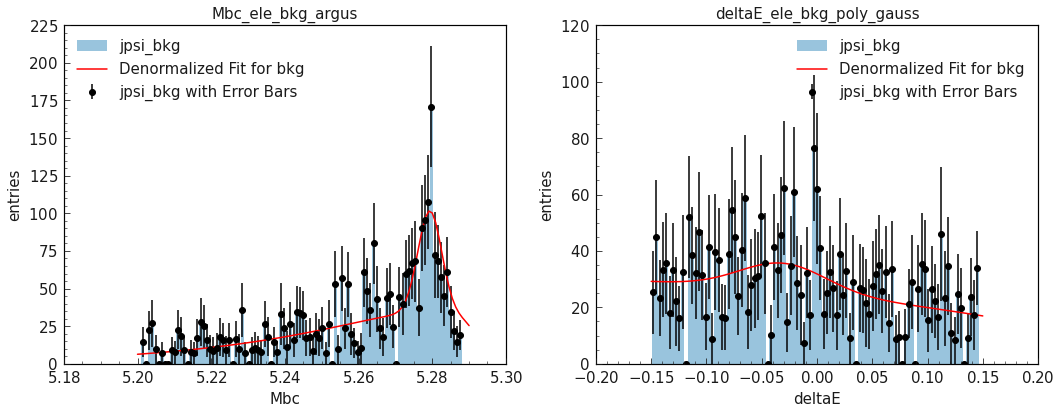

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Changed to 1 row, 2 columns

Mbc_range = np.linspace(5.20, 5.29, 100)
deltaE_range = np.linspace(-0.15, 0.15, 100)



fit_model_Mbc_jpsi_bkg = plot_with_fit(axs[0],100, mc_ele_bkg["Mbc"],mc_ele_bkg_weight, 
                                           Mbc_ele_bkg_argus_gauss, Mbc_range, 
                                           'jpsi_bkg', 'Denormalized Fit for bkg', 
                                           'Mbc', 'entries', 'Mbc_ele_bkg_argus')


fit_model_deltaE_jpsi_bkg = plot_with_fit(axs[1],100, mc_ele_bkg["deltaE"], mc_ele_bkg_weight, 
                                             deltaE_ele_bkg_poly_gauss, deltaE_range, 
                                             'jpsi_bkg', 'Denormalized Fit for bkg', 
                                             'deltaE', 'entries', 'deltaE_ele_bkg_poly_gauss')


# Adjust layout
plt.tight_layout()


# Print results if needed

print(result_Mbc_bkg.params)
print(result_Mbc_bkg.valid)
print(result_deltaE_bkg.params)
print(result_deltaE_bkg.valid)

# Show the plots
plt.show()


In [10]:
#Signal
Mbc_ele_signal_cb_fixed= fit_fixed('Mbc', 'ele', 'signal', mc_ele_signal["Mbc"],mc_ele_signal_weight,'cb',12)
deltaE_ele_signal_cb_gauss_fixed= fit_fixed('deltaE', 'ele', 'signal', mc_ele_signal["deltaE"],mc_ele_signal_weight, 'cb_gauss',12)


#bkg
Mbc_ele_bkg_argus_gauss_fixed= fit_fixed('Mbc', 'ele', 'bkg', mc_ele_bkg["Mbc"],mc_ele_bkg_weight, 'argus_gauss',12)
deltaE_ele_bkg_poly_gauss_fixed = fit_fixed('deltaE', 'ele', 'bkg', mc_ele_bkg["deltaE"],mc_ele_bkg_weight, 'poly_gauss',12)


In [11]:
Signal_Mbc = mc_ele_signal["Mbc"]
Signal_deltaE = mc_ele_signal["deltaE"]

Background_Mbc = mc_ele_bkg["Mbc"]
Background_deltaE = mc_ele_bkg["deltaE"]

Signal_total = pd.concat([Signal_Mbc, Signal_deltaE], axis=1)
Background_total = pd.concat([Background_Mbc, Background_deltaE], axis=1)

Signal_weight = mc_ele_signal_weight
Background_weight = mc_ele_bkg_weight


Mbc_signal_pdf,deltaE_signal_pdf,Mbc_background_pdf,deltaE_background_pdf,signal_extended, background_extended, total_model, result = fit_extended_model(
    Mbc_ele_signal_cb_fixed,deltaE_ele_signal_cb_gauss_fixed,Mbc_ele_bkg_argus_gauss_fixed,deltaE_ele_bkg_poly_gauss_fixed,
    pd.concat([Signal_total, Background_total]),
    pd.concat([Signal_weight, Background_weight]),1000,1000
)

#result.hesse(name='hesse')
result.errors(name='errors')
print(result.params)
print(result.valid)

/afs/desy.de/user/j/jipatel/.local/lib/python3.8/site-packages/zfit/core/basepdf.py:585: UserWarning: As `copy` is not yet properly implemented, this may fails (for ProductPDF for example?). Thiswill be fixed in the future.
  warnings.warn(
/afs/desy.de/user/j/jipatel/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1340: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn(


name                                      value  (rounded)               errors    at limit
--------------------------------------  ------------------  -------------------  ----------
signal_yield_0.4294                                2389.97  -     57   +     61       False
background_yield_0.4294                            2473.18  -     61   +     58       False
mu_ele_Mbc_signal_cb_0.7295                        5.27879  -6.8e-05   +6.9e-05       False
frac_ele_deltaE_signal_cb_gauss_0.7449            0.452226  -  0.022   +  0.022       False
frac_ele_Mbc_bkg_argus_gauss_0.9383               0.892662  -  0.017   +  0.017       False
frac_ele_deltaE_bkg_poly_gauss_0.9478              1.00552  -  0.023   +  0.024       False
True


In [15]:
process_fit_and_mc_results(result, signal_extended, background_extended, mc_ele_signal_weight,  mc_ele_bkg_weight, 
                               12, 'ee', 0.0762, 'Bp','Psi',apply_correction=True)

Results from Fit:
Signal Events = 2389.972
Background Events = 2473.184

Results from MC Data:
Signal Events in MC Data = 2098.556
Background Events in MC Data = 2764.451

Signal Events difference = -291.416
Background Events difference = 291.267
B_to_K*_Psi_Branching_ratio(Fit Data): 0.000618+/-0.000023
B_to_K*_Psi_Branching_ratio(MC Data): 0.000543+/-0.000015
B_to_K*_Psi_Branching_ratio_from_PDG: 0.00067+/-0.00014


In [16]:
process_fit_and_mc_results(result, signal_extended, background_extended, mc_ele_signal_weight,  mc_ele_bkg_weight, 
                               12, 'ee', 0.0762, 'Bp','Psi',apply_correction=False)

Results from Fit:
Signal Events = 2389.972
Background Events = 2473.184

Results from MC Data:
Signal Events in MC Data = 2098.556
Background Events in MC Data = 2764.451

Signal Events difference = -291.416
Background Events difference = 291.267
B_to_K*_Psi_Branching_ratio(Fit Data): 0.000575+/-0.000021
B_to_K*_Psi_Branching_ratio(MC Data): 0.000504+/-0.000014
B_to_K*_Psi_Branching_ratio_from_PDG: 0.00067+/-0.00014


/tmp/ipykernel_350994/2517693746.py:58: RuntimeWarning: divide by zero encountered in true_divide
  pulls = (n - y_total_fit_binned) / errors
/tmp/ipykernel_350994/2517693746.py:58: RuntimeWarning: divide by zero encountered in true_divide
  pulls = (n - y_total_fit_binned) / errors


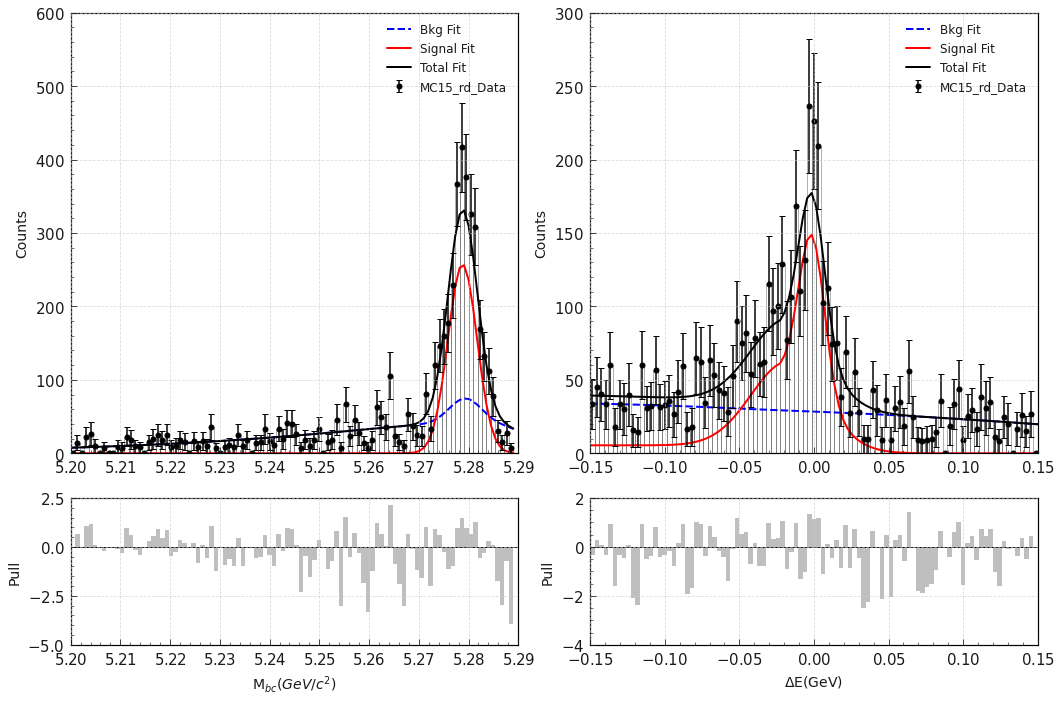

In [17]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot Mbc
plot_variable(axs[0, 0], axs[1, 0], "Mbc", mc_ele_signal, mc_ele_bkg,mc_ele_signal_weight, mc_ele_bkg_weight,  
              Mbc_signal_pdf, Mbc_background_pdf, "Signal Fit", "Bkg Fit", "M$_{bc}(GeV/c^2)$")

# Plot deltaE
plot_variable(axs[0, 1], axs[1, 1], "deltaE", mc_ele_signal, mc_ele_bkg,mc_ele_signal_weight, mc_ele_bkg_weight,  
              deltaE_signal_pdf, deltaE_background_pdf, "Signal Fit", "Bkg Fit", '$\\Delta$E(GeV)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('Bpeepip_Psi_decay_ee.pdf')
plt.show()
